In [1]:
#Scraping
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import json
import requests
import time

from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from scipy.optimize import root_scalar

#Threading
from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:
# urls=['https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087r556?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202227-bond-2027-ca135087n837?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202225-bond-2025-ca135087n340?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202127-bond-2027-ca135087m847?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201925-bond-2025-ca135087k528?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087r978?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202126-bond-2026-ca135087l930?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/8_000-canada-government-of-bond-2027-ca135087vw17?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201526-bond-2026-ca135087e679?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202025-bond-2025-ca135087k940?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201627-bond-2027-ca135087f825?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202227-bond-2027-ca135087p733?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202326-bond-2026-ca135087p816?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087s398?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202225-bond-2025-ca135087p659?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202026-bond-2026-ca135087l518?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201425-bond-2025-ca135087d507?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202326-bond-2026-ca135087r226?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202325-bond-2025-ca135087q806?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202325-bond-2025-ca135087q640?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202325_sq319-bond-2025-ca135087q319?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/9_000-canada-government-of-bond-2025-ca135087vh40?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202427-bond-2027-ca135087s547?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202225-bond-2025-ca135087p246?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/5_750-canada-government-of-bond-2033-ca135087xg49?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/5_750-canada-government-of-bond-2029-ca135087wl43?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202430-bond-2030-ca135087s471?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202434-bond-2034-ca135087s216?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202429-bond-2029-ca135087r895?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202434-bond-2034-ca135087r713?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202334-bond-2034-ca135087r481?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202329-bond-2029-ca135087q988?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202333-bond-2033-ca135087q723?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202328-bond-2028-ca135087q491?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202228-bond-2028-ca135087p576?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202232-bond-2032-ca135087p329?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202229-bond-2029-ca135087n670?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202232-bond-2032-ca135087n597?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202131-bond-2031-ca135087n266?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202131-bond-2031-ca135087m276?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_202030_series_l443-bond-2030-ca135087l443?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201829-bond-2029-ca135087j397?miRedirects=1',
#       'https://markets.businessinsider.com/bonds/canadacd-bonds_201728-bond-2028-ca135087h235?miRedirects=1']

# def get_bond_info(url):

#     bond_info_dict = {}
    
#     driver = webdriver.Chrome()
#     driver.get(url)
#     driver.refresh()

#     #Find basic bond information
#     rows = driver.find_elements(By.XPATH, "//tbody[@class='table__tbody']/tr")
    
#     time.sleep(1)
    
#     basic_info = []
#     ix=0
#     for row in rows:
#         if ix in [0, 8, 10, 15]: # ISIN, Issue Date, Coupon, Maturity Date
#             cells = row.find_elements(By.XPATH, "./td")
#             if len(cells) > 1:
#                 basic_info.append(cells[1].text)
#         ix+=1

#     bond_info_dict[basic_info[0]] = {'Issue_Date': basic_info[1], 'Coupon': basic_info[2], 'Maturity_Date': basic_info[3]}

#     #Find historical bond information
#     network_logs = driver.execute_script("return window.performance.getEntriesByType('resource');")

#     time.sleep(1)
    
#     # Find the relevant request
#     for log in network_logs:
#         if "Chart_GetChartData" in log["name"]:  # Look for the specific request
#             api_url = log["name"]
#             break
#     # Use requests to fetch
    
#     response = requests.get(api_url)
#     if response.status_code == 200:
#         hist_data = response.json()
#         for item in hist_data:
#             date = datetime.strptime(item["Date"],'%Y-%m-%d %H:%M')
#             if date >= datetime(2025,1,6) and date <= datetime(2025,1,17):
#                 #Update dictionary
#                 bond_info_dict[basic_info[0]][datetime.strptime(item["Date"],'%Y-%m-%d %H:%M').strftime('%m-%d')] = item["Close"]
#     else:
#         print(f"Failed to fetch data. Status code: {response.status_code}")

#     driver.quit()

#     return bond_info_dict

In [3]:
# results = Parallel(n_jobs=5)(delayed(get_bond_info)(link) for link in tqdm(urls, position=0, leave=True))

# bond_info_dict = {}
# for d in results:
#     bond_info_dict.update(d)
    
# df=pd.DataFrame.from_dict(bond_info_dict).transpose().reset_index().rename(columns={'index':'ISIN'})

# if len(df.index)==43:
#     df.to_excel('bonds.xlsx',index=False)
# else:
#     print('Problem')

In [4]:
df=pd.read_excel('bonds.xlsx')
df['Maturity_Date'] = pd.to_datetime(df['Maturity_Date'])
df['Coupon'] = df['Coupon'].str[:-2].astype(float)
df['Name'] = (
    'CAN ' 
    + df['Coupon'].apply(lambda x: f"{x:.2f}")
    + np.where(df['Maturity_Date'].dt.month == 3, ' Mar', ' Sep') 
    +' '
    + df['Maturity_Date'].dt.year.astype(str).str[-2:]
)

In [5]:
chosen_df=(
    df.loc[df['Maturity_Date'] <= datetime(2031,1,1)]
    .sort_values(by='Maturity_Date')
    .loc[df['Maturity_Date']
    .dt.month.isin([3,9])]
    .reset_index(drop=True)
)

In [6]:
#Dirty pricer
for row in chosen_df.iterrows():
    ix,col=row
    for day in [o for o in chosen_df.columns if '01' in o]:
        days_since_last = (datetime(2025,int(day[:2]),int(day[-2:]))-datetime(2024,9,1)).days
        days_between_coupons = (datetime(2025,3,1)-datetime(2024,9,1)).days
        chosen_df.at[ix,day] += days_since_last / days_between_coupons * chosen_df.at[ix,'Coupon'] / 2

In [7]:
def ytm_calc(bond_price, 
             coupon_rate,
             maturity_date,
             obs_date,
             face_value=100, 
             ):
    
    next_coupon_date = datetime(2025,3,1)

    # Calculate the time to each cash flow
    days_until_next_coupon = (next_coupon_date - obs_date).days
    coupons = []
    dates = []

    current_date = next_coupon_date
    while current_date <= maturity_date:
        dates.append(current_date)
        coupons.append(coupon_rate / 2)
        current_date += relativedelta(months=6)

    # Adjust for the face value at maturity
    coupons[-1] += face_value

    # Convert dates to times (in years)
    times = np.array([(date - obs_date).days / 365 for date in dates])

    # Define the present value function
    def present_value(ytm):
        return sum(c * np.exp(-ytm * t) for c, t in zip(coupons, times)) - bond_price

    # Solve for ytm
    result = root_scalar(present_value, bracket=[0, 1], method='brentq')

    # Output the result
    return result.root

In [8]:
bond_ytm_dict={}
for row in chosen_df.iterrows():
    ix,col=row
    bond_ytm_dict[chosen_df.at[ix,'ISIN']] = {}
    bond_ytm_dict[chosen_df.at[ix,'ISIN']]['Name'] = chosen_df.at[ix,'Name']
    bond_ytm_dict[chosen_df.at[ix,'ISIN']]['Issue_Date'] = chosen_df.at[ix,'Issue_Date']
    bond_ytm_dict[chosen_df.at[ix,'ISIN']]['Coupon'] = chosen_df.at[ix,'Coupon']
    bond_ytm_dict[chosen_df.at[ix,'ISIN']]['Maturity_Date'] = chosen_df.at[ix,'Maturity_Date']
    for day in [o for o in chosen_df.columns if '01' in o]:
        bond_ytm_dict[chosen_df.at[ix,'ISIN']][day] = ytm_calc(chosen_df.at[ix,day],
                                                               chosen_df.at[ix,'Coupon'],
                                                               chosen_df.at[ix,'Maturity_Date'],
                                                               datetime(2025,int(day[:2]),int(day[-2:])))
        
ytm_df = pd.DataFrame.from_dict(bond_ytm_dict).transpose().reset_index().rename(columns={'index':'ISIN'})
ytm_df['Maturity_Date'] = pd.to_datetime(ytm_df['Maturity_Date'])
ytm_df['Months Ahead'] = (ytm_df['Maturity_Date'].dt.year - datetime.today().year) * 12 + \
                            (ytm_df['Maturity_Date'].dt.month - datetime.today().month)

<AxesSubplot:title={'center':'Yield Curve w/ Terms 2 Months to 56 Months'}, xlabel='Months Ahead', ylabel='ytm'>

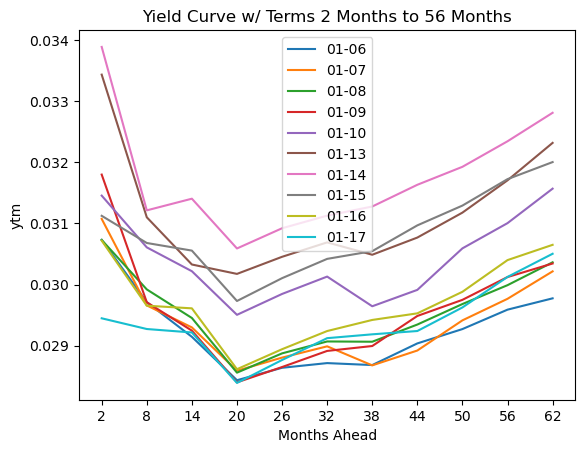

In [9]:
ytm_df.plot(x='Months Ahead', 
            y=[o for o in ytm_df.columns if '01' in o],
            ylabel='ytm',
            xticks=[2,8,14,20,26,32,38,44,50,56,62], 
            title='Yield Curve w/ Terms 2 Months to 56 Months')

In [10]:
day_spot_dict = {}

for day in [o for o in chosen_df.columns if '01' in o]:
    
    bonds = []    
    time_to_maturity = []
    
    for row in chosen_df.iterrows():
        ix,col=row
        bonds.append((chosen_df.at[ix,day], chosen_df.at[ix,'Coupon'], chosen_df.at[ix,'Maturity_Date']))
        time_to_maturity.append((chosen_df.at[ix,'Maturity_Date'] - datetime(2025,int(day[:2]),int(day[-2:]))).days)
        
    spot_rates = np.zeros(len(bonds))
        
    # i is number of coupons left, not including final payout
    for i, (price, coupon_rate, maturity_date) in enumerate(sorted(bonds, key=lambda x: x[2])):
    
        cash_flows = np.array([coupon_rate/2] * i)

        if i == 0:
            spot_rate = -np.log(price / (100+coupon_rate/2)) / (time_to_maturity[0] / 365)
            
        else:
            discounted_cash_flows = np.sum([cf * np.exp(-spot_rates[j] * time_to_maturity[j]/365)
                                            for j, cf in enumerate(cash_flows)])

            residual = price - discounted_cash_flows
            
            spot_rate = -np.log(residual / (100 + coupon_rate/2)) / (time_to_maturity[i]/365)
            
        spot_rates[i] = spot_rate

    day_spot_dict[day] = spot_rates
    
spot_df = chosen_df.copy()
spot_df.iloc[:,4:-1]=pd.DataFrame.from_dict(day_spot_dict)
spot_df['Months Ahead'] = (spot_df['Maturity_Date'].dt.year - datetime.today().year) * 12 + \
                            (spot_df['Maturity_Date'].dt.month - datetime.today().month)

<AxesSubplot:title={'center':'Spot Curve w/ Terms 2 months to 56 months'}, xlabel='Months Ahead', ylabel='Spot Rate'>

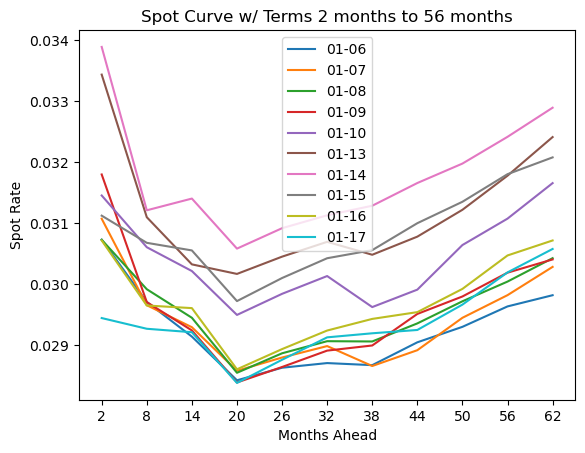

In [11]:
spot_df.plot(x='Months Ahead', 
             y=[o for o in spot_df.columns if '01' in o],
             ylabel='Spot Rate', 
             xticks=[2,8,14,20,26,32,38,44,50,56,62],
             title='Spot Curve w/ Terms 2 months to 56 months')

In [12]:
day_forward_dict = {}
for day in [o for o in spot_df[1:].columns if '01' in o]:
    spot_rates = list(spot_df[1:][day])
    maturity_dates = list(spot_df[1:]['Maturity_Date'])
    
    t = (maturity_dates[0] - datetime(2025,int(day[:2]),int(day[-2:]))).days / 365
    
    forward_rates = []
    for i in range(len(spot_rates))[1:]:
        t_n = (maturity_dates[i] - datetime(2025,int(day[:2]),int(day[-2:]))).days / 365
        n = (maturity_dates[i] - maturity_dates[0]).days / 365
        forward_rate = (spot_rates[i] * t_n - spot_rates[0] * t) / n
        forward_rates.append(forward_rate)
            
    day_forward_dict[day] = forward_rates
    
forward_df = chosen_df[2:].copy().reset_index(drop=True)
forward_df.iloc[:,4:-1]=pd.DataFrame.from_dict(day_forward_dict)
forward_df['Months Ahead'] = (forward_df['Maturity_Date'].dt.year - datetime.today().year) * 12 + \
                             (forward_df['Maturity_Date'].dt.month - datetime.today().month)

<AxesSubplot:title={'center':'8-Month Forward Curve w/ Terms 14 months to 56 months'}, xlabel='Months Ahead', ylabel='Forward Rate'>

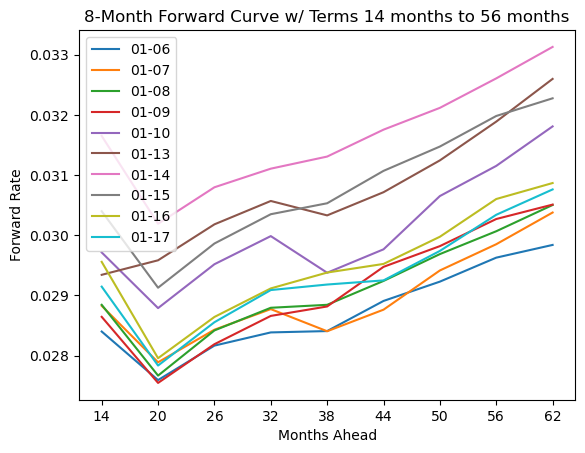

In [13]:
forward_df.plot(x='Months Ahead', 
                y=[o for o in forward_df.columns if '01' in o],
                ylabel='Forward Rate',title='8-Month Forward Curve w/ Terms 14 months to 56 months',
                xticks=[14,20,26,32,38,44,50,56,62])

In [68]:
#Interpolate YTM
# day_ytm_dict = {}

# for day in [o for o in ytm_df.columns if '01' in o]:
#     day_ytm_dict[day] = []
    
#     for i in range(1,6):
#         ix1 = 2 * (i - 1) + 1
#         ix2 = ix1 + 1
        
#         numer = ytm_df.at[ix2, day] - ytm_df.at[ix1, day]
#         denom = (ytm_df.at[ix2, 'Maturity_Date'] - ytm_df.at[ix1, 'Maturity_Date']).days
#         slope = numer / denom
        
#         days_until_i = (datetime.today() + relativedelta(years=i) - ytm_df.at[ix1, 'Maturity_Date']).days

#         value_at_year_i =  ytm_df.at[ix1, day] + days_until_i * slope
    
#         day_ytm_dict[day].append(value_at_year_i)

# inter_ytm_df = pd.DataFrame.from_dict(day_ytm_dict)

# #Cov
# ytm_columns = inter_ytm_df.columns

# ytm_log_returns = np.log(inter_ytm_df[ytm_columns].iloc[:, 1:].values /
#                          inter_ytm_df[ytm_columns].iloc[:, :-1].values)

# ytm_returns_df = pd.DataFrame(ytm_log_returns, columns=ytm_columns[1:]).transpose()

# ytm_cov_matrix = ytm_returns_df.cov()

# #Eigen
# eigenvalues, eigenvectors = np.linalg.eig(ytm_cov_matrix)

# ytm_eigen_dict = {eigenvalues[i]: eigenvectors[:, i] for i in range(len(eigenvalues))}

In [76]:
from scipy.interpolate import interp1d

interpolated_rates = {}

x_axis = list((ytm_df['Maturity_Date'] - datetime.today()).dt.days)

for col in [o for o in ytm_df if '01' in o]:
    rates = []
    for i in [1, 2, 3, 4, 5]:
        r = np.interp((datetime.today() + relativedelta(years=i) - datetime.today()).days, x_axis, list(ytm_df[col]))
        rates.append(r)
    interpolated_rates[col] = rates

inter_ytm_df = pd.DataFrame(interpolated_rates)

ytm_columns = inter_ytm_df.columns

ytm_log_returns = np.log(inter_ytm_df[ytm_columns].iloc[:, 1:].values /
                         inter_ytm_df[ytm_columns].iloc[:, :-1].values)

ytm_returns_df = pd.DataFrame(ytm_log_returns, columns=ytm_columns[1:]).transpose()

ytm_cov_matrix = ytm_returns_df.cov()

#Eigen
eigenvalues, eigenvectors = np.linalg.eig(ytm_cov_matrix)

ytm_eigen_dict = {eigenvalues[i]: eigenvectors[:, i] for i in range(len(eigenvalues))}

In [78]:
ytm_cov_matrix

,0,1,2,3,4
0,0.000483,0.000496,0.000459,0.000478,0.000495
1,0.000496,0.000585,0.000518,0.000532,0.000586
2,0.000459,0.000518,0.000507,0.000520,0.000529
3,0.000478,0.000532,0.000520,0.000552,0.000554
4,0.000495,0.000586,0.000529,0.000554,0.000602


In [79]:
ytm_eigen_dict

{0.002619151525598357: array([-0.41155395, -0.46478918, -0.43300112, -0.45071322, -0.47324622]),
 1.6692041720557343e-06: array([ 0.13392801, -0.56014557,  0.34266494, -0.47375901,  0.57134348]),
 1.2069412289099963e-05: array([-0.11410255,  0.33017512,  0.69762008, -0.44645092, -0.438147  ]),
 4.971614439638396e-05: array([-0.87422608,  0.21100339,  0.06813723,  0.06721974,  0.42666749]),
 4.723458828308108e-05: array([ 0.18813825,  0.56273432, -0.45141367, -0.6071022 ,  0.27493035])}

In [17]:
#Interpolate the spot curve
day_spot_dict = {}

for day in [o for o in spot_df.columns if '01' in o]:
    day_spot_dict[day] = []
    
    for i in range(1,6):
        ix1 = 2 * (i - 1) + 1
        ix2 = ix1 + 1
        
        numer = spot_df.at[ix2, day] - spot_df.at[ix1, day]
        denom = (spot_df.at[ix2, 'Maturity_Date'] - spot_df.at[ix1, 'Maturity_Date']).days
        slope = numer / denom
        
        days_until_i = (datetime.today() + relativedelta(years=i) - spot_df.at[ix1, 'Maturity_Date']).days

        value_at_year_i =  spot_df.at[ix1, day] + days_until_i * slope
    
        day_spot_dict[day].append(value_at_year_i)

inter_spot_df = pd.DataFrame.from_dict(day_spot_dict)

#Convert to forward
day_forward_dict = {}
for day in inter_spot_df.columns:
    day_forward_dict[day] = []
    for ix in range(1,5):
        spot_rate = (inter_spot_df.at[ix, day] * (ix+1) - inter_spot_df.at[0, day]) / ix
        day_forward_dict[day].append(spot_rate)
inter_forward_df = pd.DataFrame.from_dict(day_forward_dict)

#Cov
forward_columns = inter_forward_df.columns

forward_log_returns = np.log(inter_forward_df[forward_columns].iloc[:, 1:].values /
                             inter_forward_df[forward_columns].iloc[:, :-1].values)

forward_returns_df = pd.DataFrame(forward_log_returns, columns=forward_columns[1:]).transpose()

forward_cov_matrix = forward_returns_df.cov()

#Eigen
eigenvalues, eigenvectors = np.linalg.eig(forward_cov_matrix)

forward_eigen_dict = {eigenvalues[i]: eigenvectors[:, i] for i in range(len(eigenvalues))}

In [80]:
chosen_df

,ISIN,Issue_Date,Coupon,Maturity_Date,01-06,01-07,01-08,01-09,01-10,01-13,01-14,01-15,01-16,01-17,Name
0,CA135087K528,10/11/2019,1.25,2025-03-01,100.168536,100.171989,100.185442,100.178895,100.192348,100.192707,100.196160,100.239613,100.253066,100.276519,CAN 1.25 Mar 25
1,CA135087K940,4/3/2020,0.50,2025-09-01,98.575414,98.586796,98.578177,98.599558,98.550939,98.545083,98.546464,98.587845,98.659227,98.690608,CAN 0.50 Sep 25
2,CA135087L518,10/9/2020,0.25,2026-03-01,97.077707,97.068398,97.059088,97.089779,96.990470,97.002541,96.893232,96.993923,97.104613,97.155304,CAN 0.25 Mar 26
3,CA135087L930,4/16/2021,1.00,2026-09-01,97.360829,97.343591,97.356354,97.389116,97.221878,97.140166,97.082928,97.225691,97.408453,97.451215,CAN 1.00 Sep 26
4,CA135087M847,10/15/2021,1.25,2027-03-01,97.058536,97.031989,97.025442,97.078895,96.842348,96.742707,96.656160,96.829613,97.073066,97.116519,CAN 1.25 Mar 27
5,CA135087N837,5/13/2022,2.75,2027-09-01,100.594779,100.532376,100.519972,100.567569,100.265166,100.147956,100.045552,100.233149,100.540746,100.578343,CAN 2.75 Sep 27
6,CA135087P576,10/21/2022,3.50,2028-03-01,103.047901,103.057569,102.947238,102.976906,102.786575,102.555580,102.325249,102.554917,102.904586,102.984254,CAN 3.50 Mar 28
7,CA135087Q491,4/21/2023,3.25,2028-09-01,102.240193,102.289171,102.148149,102.107127,101.966105,101.693039,101.402017,101.640994,102.149972,102.258950,CAN 3.25 Sep 28
8,CA135087Q988,10/13/2023,4.00,2029-03-01,105.473315,105.424365,105.325414,105.306464,104.977514,104.770663,104.481713,104.742762,105.313812,105.424862,CAN 4.00 Mar 29
9,CA135087R895,4/8/2024,3.50,2029-09-01,103.447901,103.377569,103.287238,103.236906,102.856575,102.575580,102.305249,102.584917,103.174586,103.304254,CAN 3.50 Sep 29


In [18]:
forward_cov_matrix

,0,1,2,3
0,0.000853,0.000613,0.000614,0.000728
1,0.000613,0.000578,0.000576,0.000569
2,0.000614,0.000576,0.000617,0.000599
3,0.000728,0.000569,0.000599,0.000668


In [19]:
forward_eigen_dict

{0.0025422322433087327: array([0.55640036, 0.45902411, 0.4723421 , 0.50656534]),
 0.00013804867944012609: array([ 0.67555017, -0.44357908, -0.56007322,  0.18217451]),
 4.432919392371261e-06: array([ 0.40336019, -0.34572598,  0.55101427, -0.6435506 ]),
 3.124597937003866e-05: array([-0.26711638, -0.68775578,  0.39949243,  0.54410167])}